# Set up

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 10)
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# Dataset

In [4]:
'''
from sklearn.datasets import make_regression

x, y, coef = make_regression(
    n_samples = 1_000,
    n_features = 10,
    n_informative = 20,
    bias = 5, 
    noise = 10,
    coef = True,
    random_state = 42)

print(coef)
ds = pd.DataFrame(x, columns = [f'x{i + 1}' for i in range(x.shape[1])])
ds['y'] = y
ds
'''

from sklearn.datasets import make_sparse_uncorrelated

x, y = make_sparse_uncorrelated(n_samples = 1_000, n_features = 10, random_state = 42)
ds = pd.DataFrame(x, columns = [f'x{i + 1}' for i in range(x.shape[1])])
ds['y'] = y
ds

x1        x2        x3        x4        x5  ...        x7  \
0    0.496714 -0.138264  0.647689  1.523030 -0.234153  ...  1.579213   
1   -0.463418 -0.465730  0.241962 -1.913280 -1.724918  ... -1.012831   
2    1.465649 -0.225776  0.067528 -1.424748 -0.544383  ... -1.150994   
3   -0.601707  1.852278 -0.013497 -1.057711  0.822545  ...  0.208864   
4    0.738467  0.171368 -0.115648 -0.301104 -1.478522  ... -0.460639   
..        ...       ...       ...       ...       ...  ...       ...   
995  0.867805  0.227405 -0.889845 -0.960780  0.254128  ...  0.391881   
996 -1.070666 -0.784321  0.688496 -0.234508  1.589147  ... -0.486631   
997 -0.912588  0.701390  0.845273  0.603781  1.515318  ...  1.674271   
998 -0.445795 -0.503722  0.525937  0.243891 -1.192973  ... -0.371462   
999  1.433625  0.191451  0.662169 -1.498635  1.194214  ... -1.998345   

           x8        x9       x10         y  
0    0.767435 -0.469474  0.542560 -4.038231  
1    0.314247 -0.908024 -1.412304  0.685619  
2    0.375698 -0.600639 -0.291694  2.418781  
3   -1.959670 -1.328186  0.196861  4.826829  
4    1.057122  0.343618 -1.763040  2.961334  
..        ...       ...       ...       ...  
995 -1.034598  0.650668  0.425911  4.784884  
996 -0.010206  0.063383 -0.728390 -3.339287  
997 -0.900921 -1.012686 -1.759959 -0.926764  
998 -1.775982 -0.980947 -0.770814 -2.079811  
999 -0.705317  0.495766  0.644388  2.455347  

[1000 rows x 11 columns]

## Dataset lookup

In [25]:
def dataset_lookup(df):
    print('Dataset info:')
    print(df.info())
    print()
    print('Dataset description:')
    print(df.describe())
    print()
    print('Amount of duplicates:')
    duplicates_amount = df.duplicated().sum()
    print(duplicates_amount)
    if (duplicates_amount > 0):
        print('Duplicates:')
        print(df[df.duplicated()])
    print()
    print('Amount of missing values:')
    print(df.isna().sum(axis = 0))
    print()
    print('Unique values in each column:')
    object_types_count = 0
    for column in df:
        if df[column].dtypes == 'object':
            object_types_count += 1
            print('-' * len(column))
            print(f'{column}: {df[column].unique()}')
    if object_types_count == 0:
        print('-' * 10)
        print('No object columns in this dataset.')
            
dataset_lookup(ds)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   x3      1000 non-null   float64
 3   x4      1000 non-null   float64
 4   x5      1000 non-null   float64
 5   x6      1000 non-null   float64
 6   x7      1000 non-null   float64
 7   x8      1000 non-null   float64
 8   x9      1000 non-null   float64
 9   x10     1000 non-null   float64
 10  y       1000 non-null   float64
dtypes: float64(11)
memory usage: 86.1 KB
None

Dataset description:
                x1           x2           x3           x4           x5  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean      0.010788     0.031292    -0.022542    -0.043075     0.013622  ...   
std       1.005433     1.016046     0.983366     0.983406     1.012645  ...   
min      -3.92

## Dataset showcase

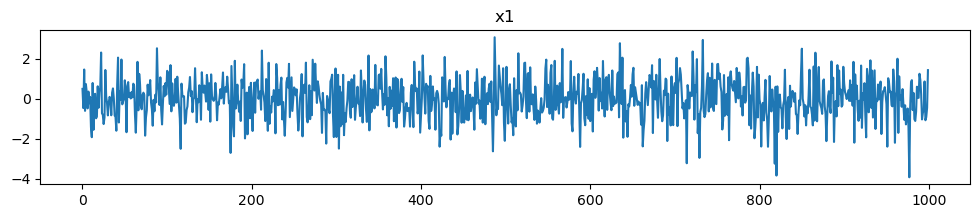

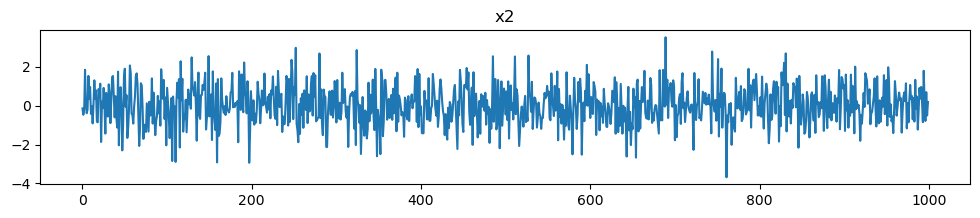

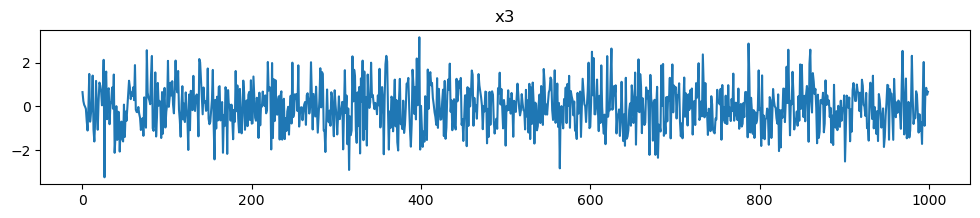

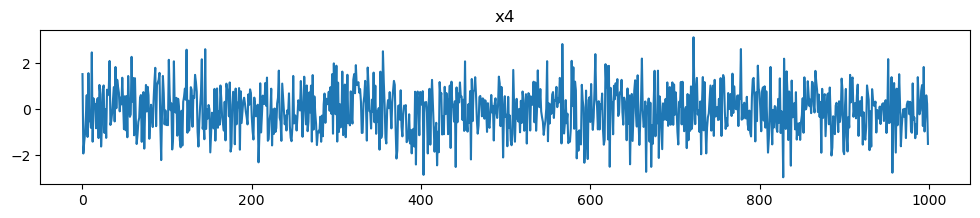

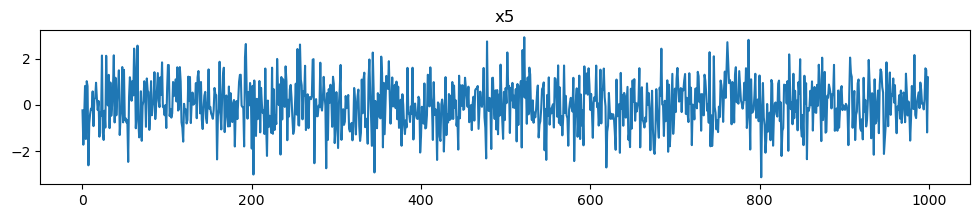

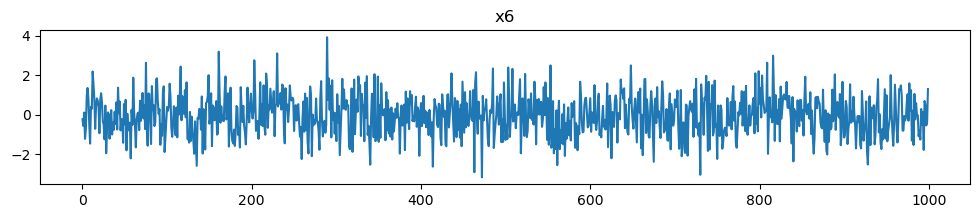

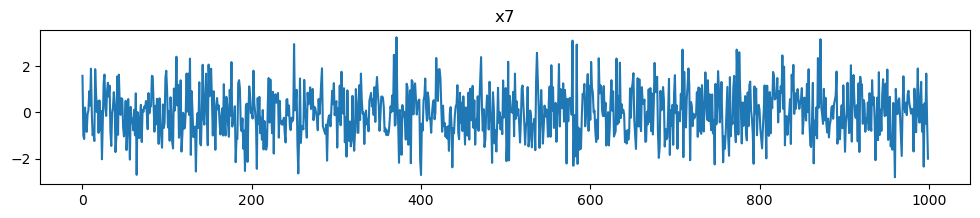

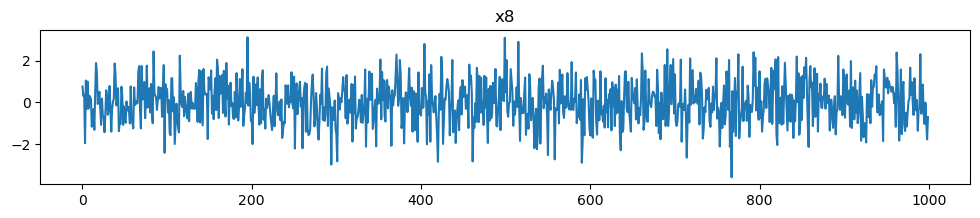

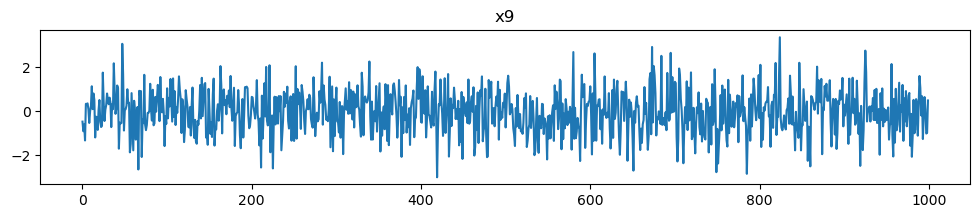

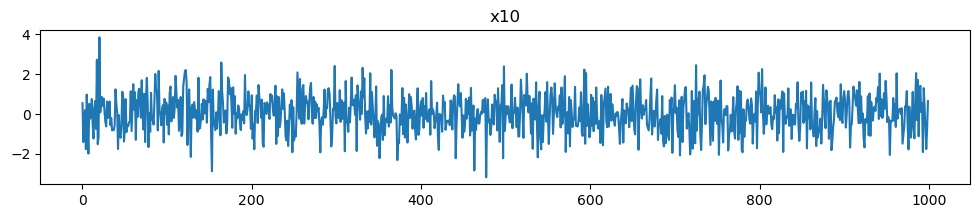

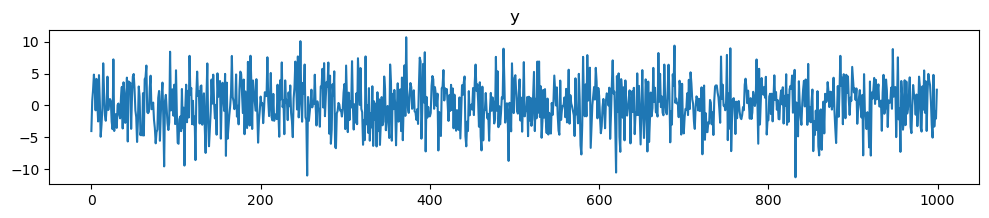

In [26]:
def plot_dataset(df, title):
    plt.figure(figsize = (12, 2))
    plt.title(title)
    df.plot()
    plt.show()

for column in list(ds.columns):   
    plot_dataset(ds[column], column)

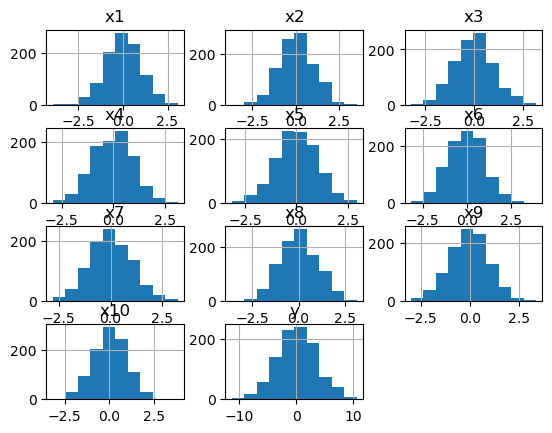

In [27]:
def plot_dataset_histograms(df):
    df.hist()
    plt.show()

plot_dataset_histograms(ds)

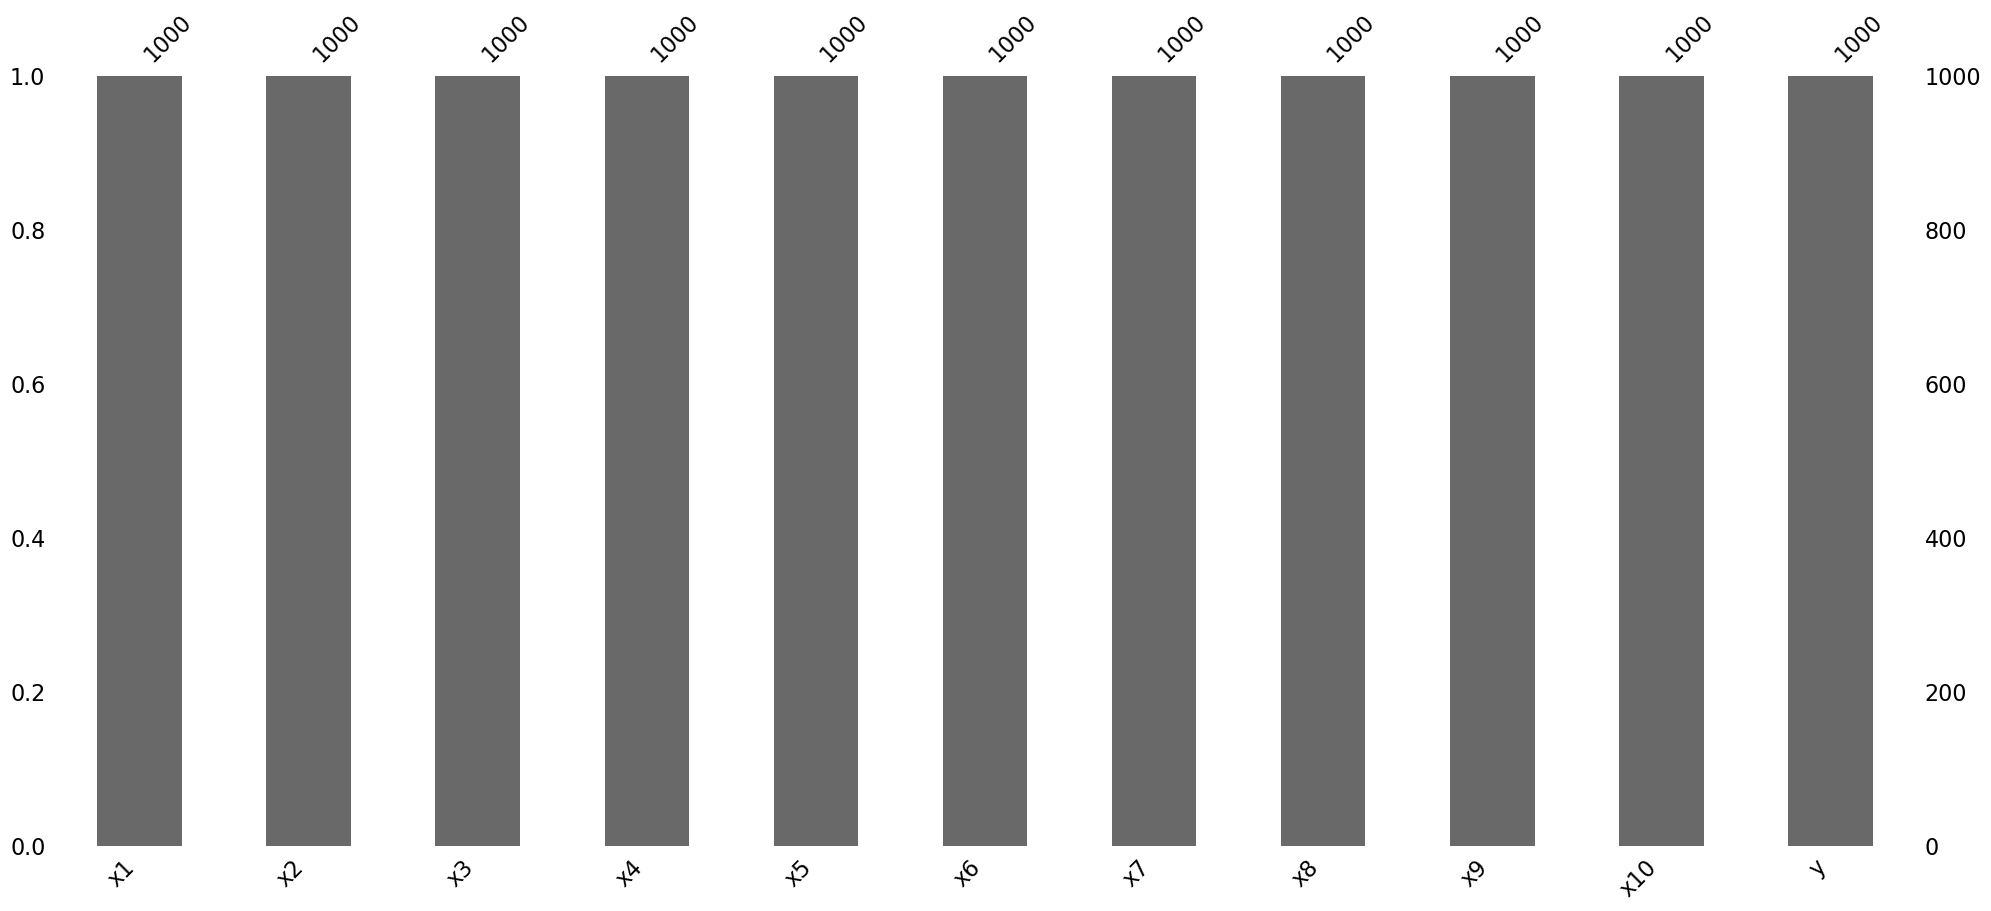

In [28]:
msno.bar(ds)
plt.show()

<Figure size 1500x1500 with 0 Axes>

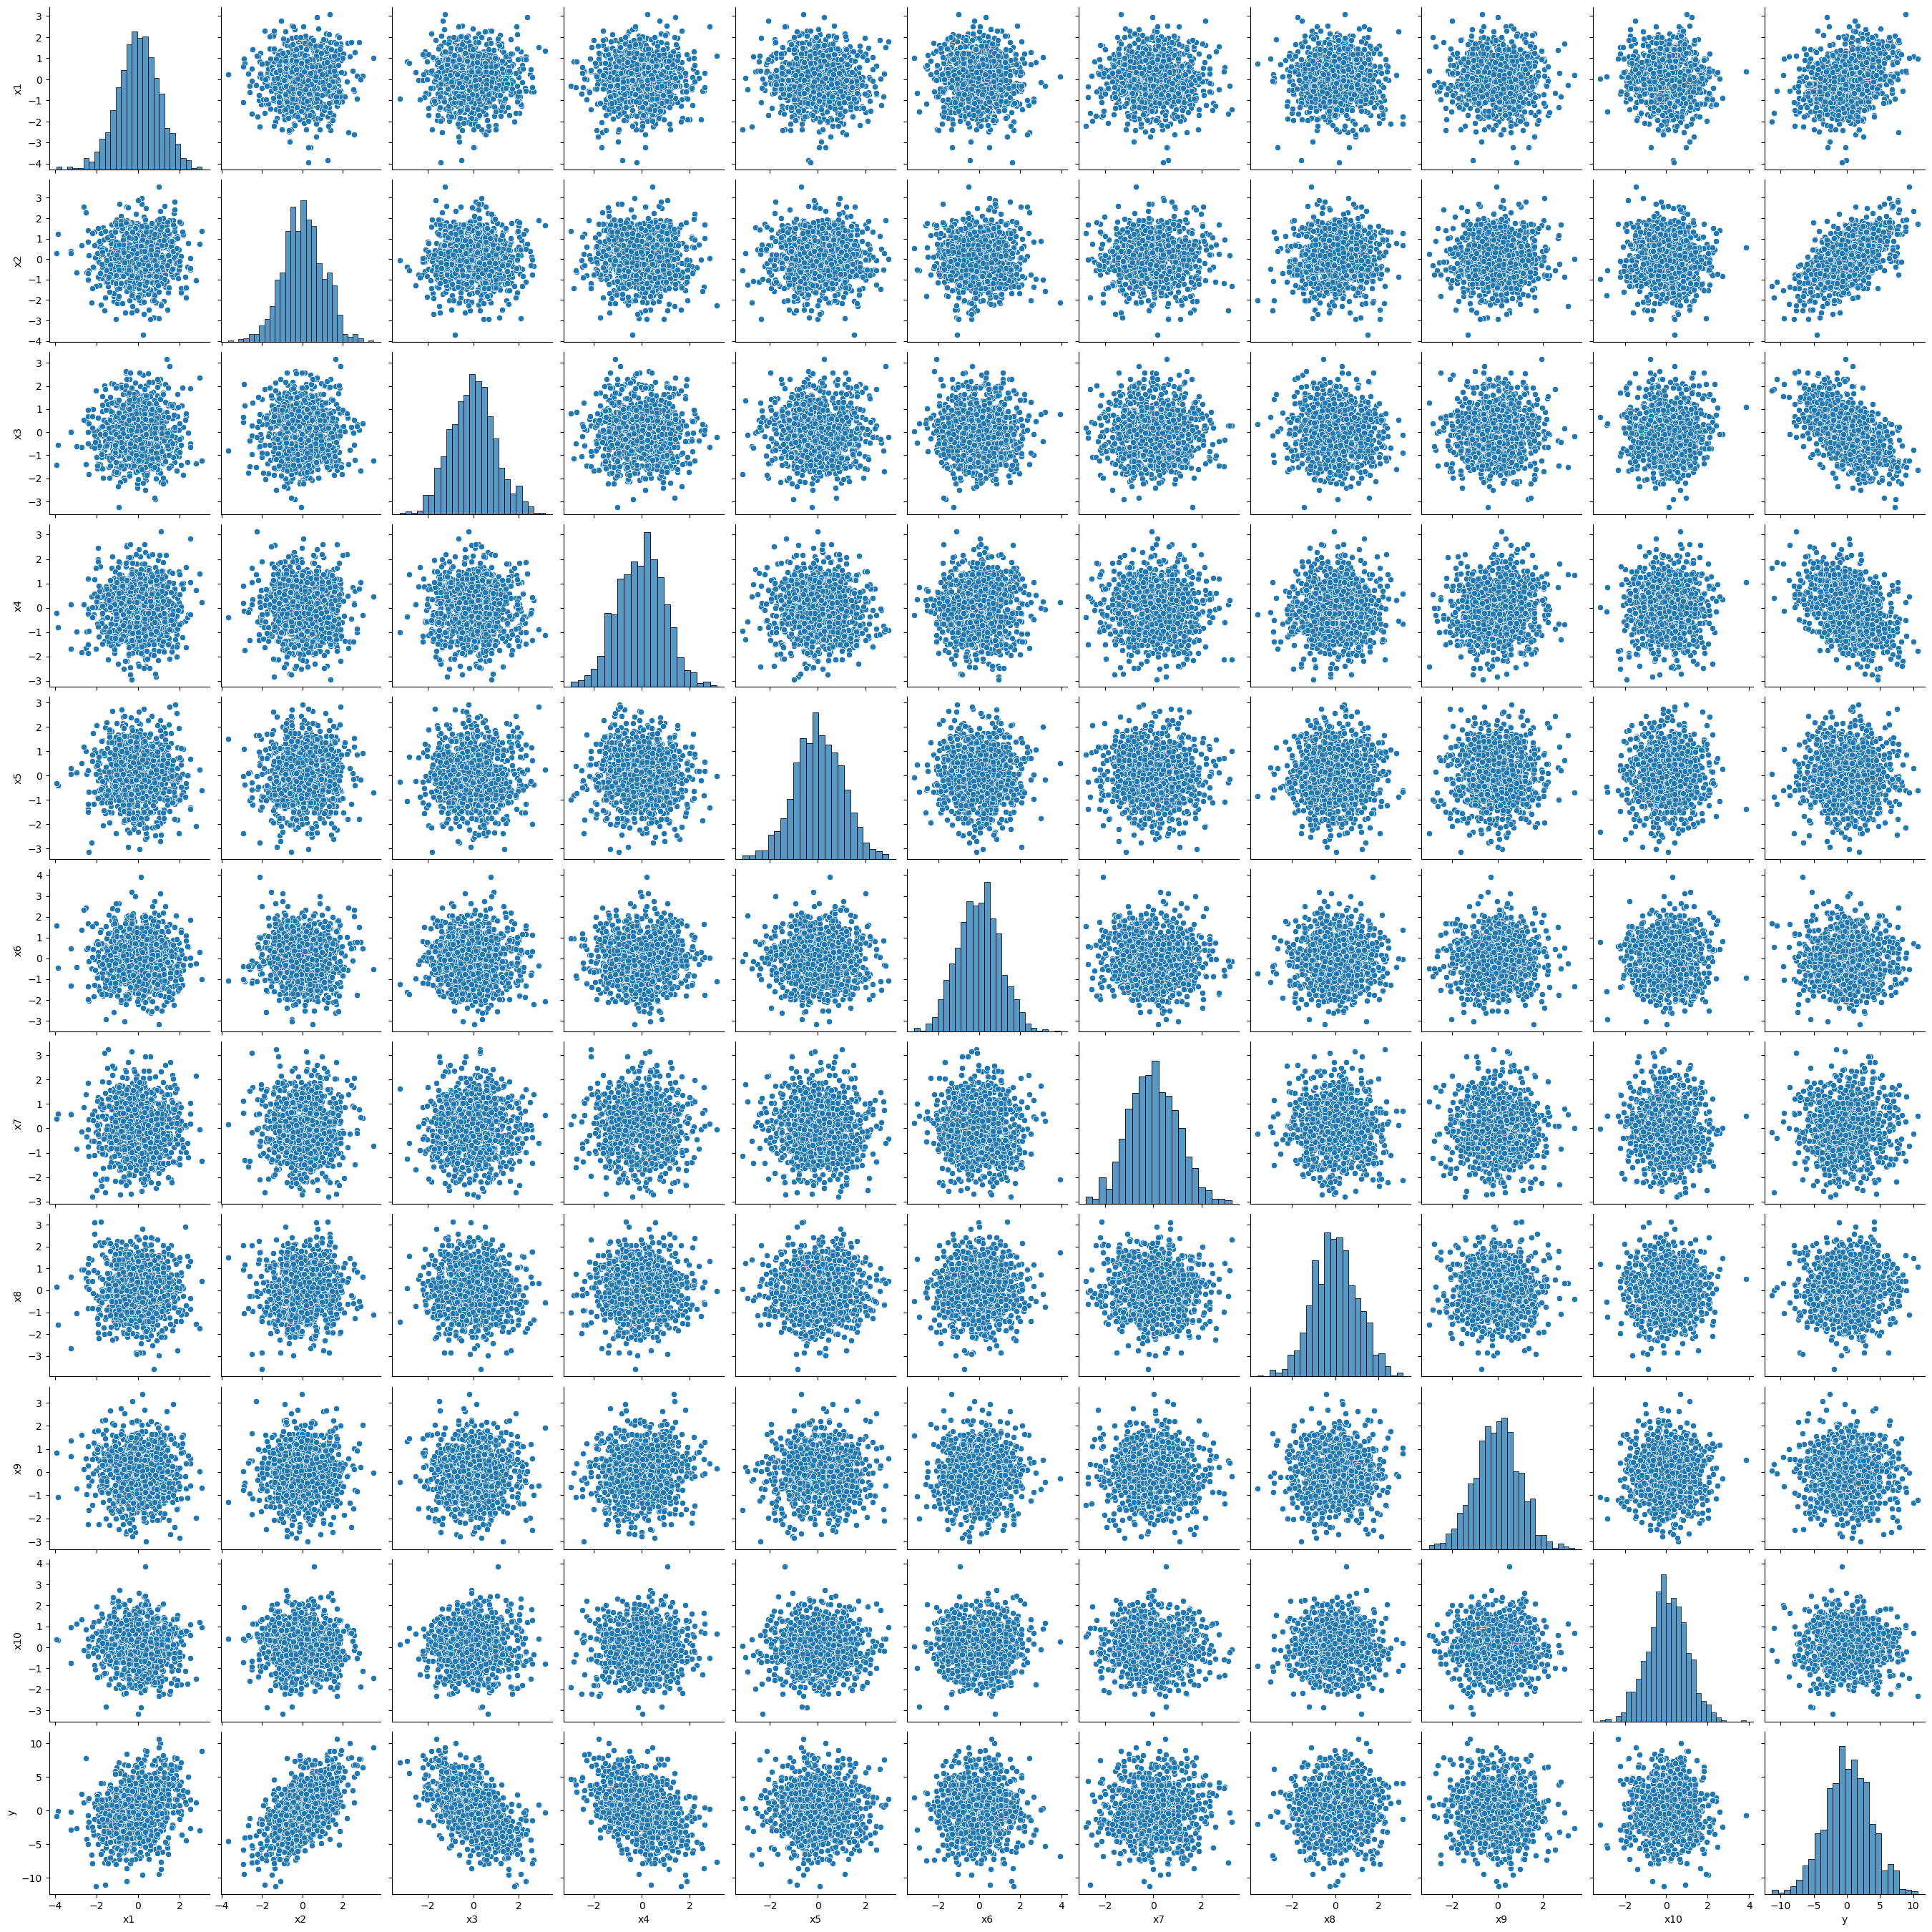

In [29]:
def show_pair_plot(df, figure_size = (15, 15)):
    plt.figure(figsize = figure_size)
    sb.pairplot(df.select_dtypes(exclude = ['object']))
    plt.show()
    
show_pair_plot(ds)

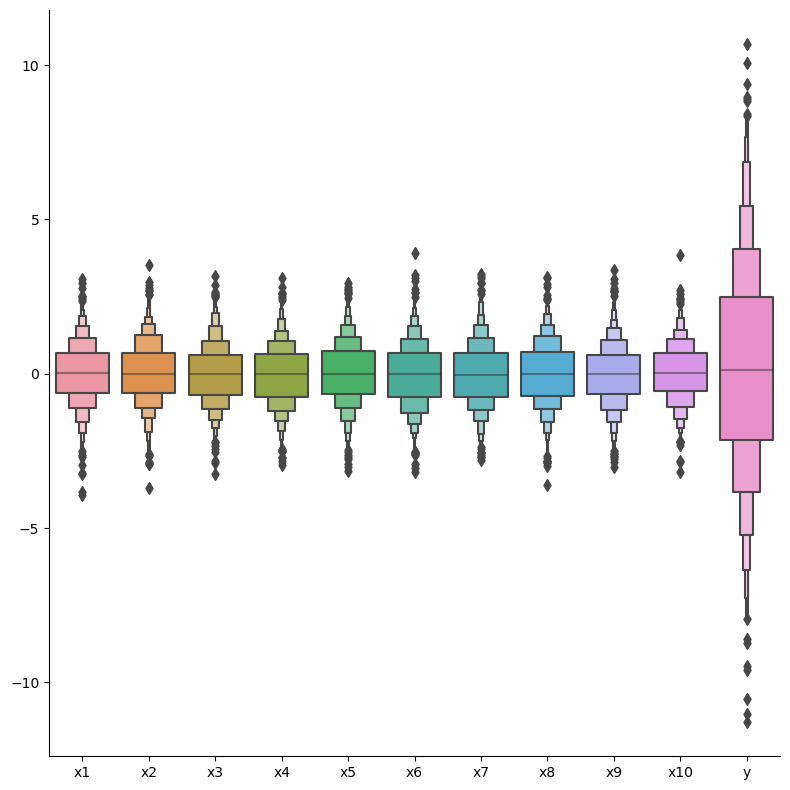

In [30]:
def show_cat_plot(df):
    sb.catplot(df, kind = 'boxen', height = 8)
    plt.show()

show_cat_plot(ds)

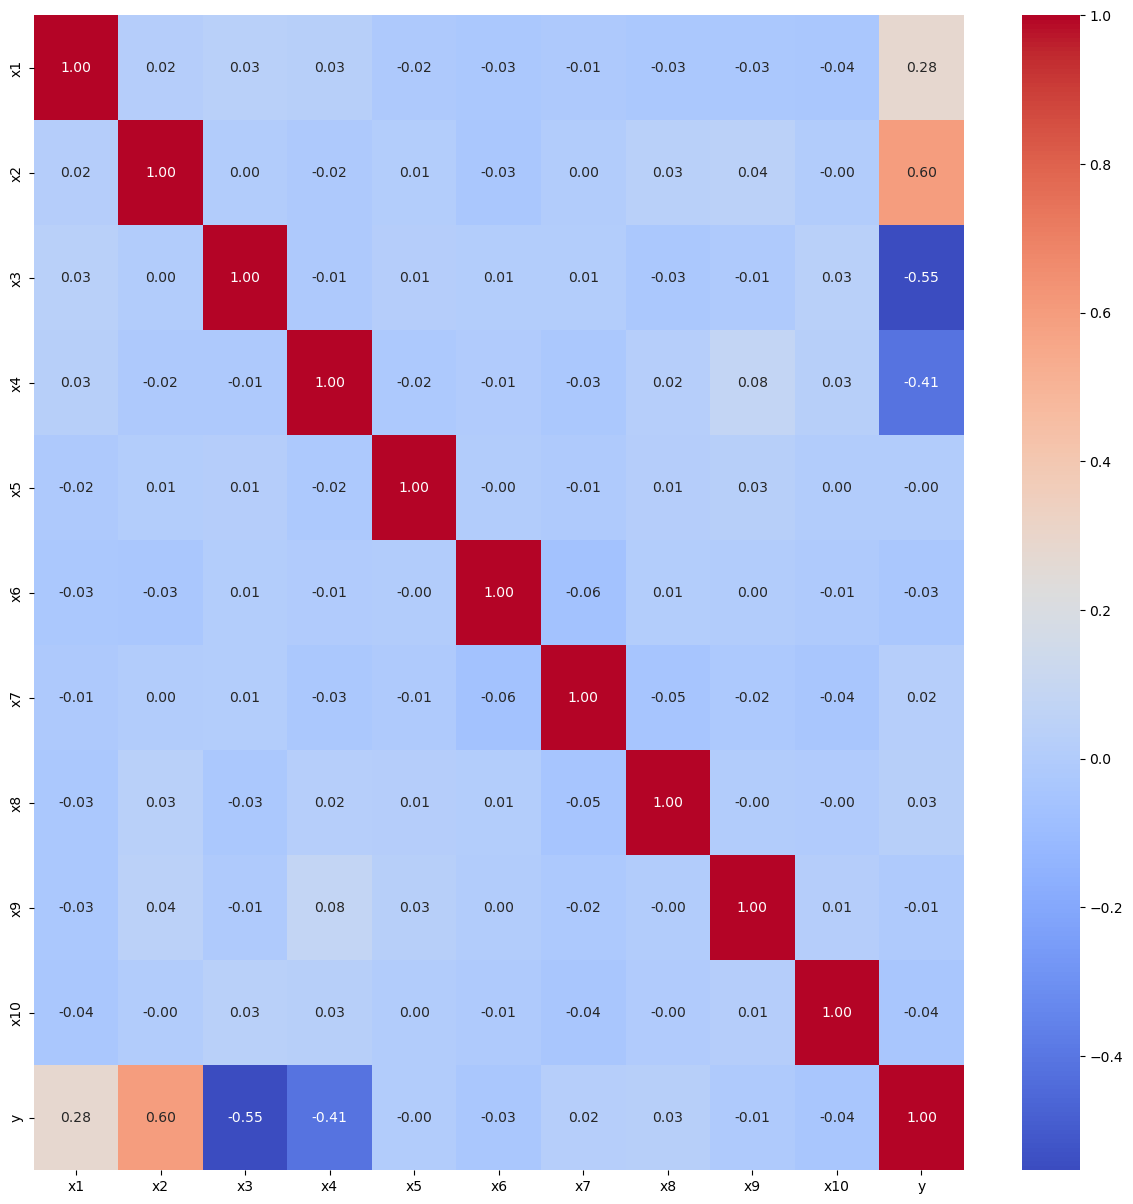

In [31]:
def show_correlation_map(df, figure_size = (15, 15)):
    plt.figure(figsize = figure_size)
    sb.heatmap(
        df.select_dtypes(exclude = ['object']).corr(),
        annot = True,
        cmap = 'coolwarm',
        fmt = '.2f')
    plt.show()

show_correlation_map(ds)

# Preprocessing

In [5]:
scaler = StandardScaler()
ds_transformed = pd.DataFrame(scaler.fit_transform(ds), columns = list(ds.columns))
ds_transformed

x1        x2        x3        x4        x5  ...        x7  \
0    0.483543 -0.166962  0.681909  1.593328 -0.244803  ...  1.534762   
1   -0.471879 -0.489418  0.269113 -1.902714 -1.717689  ... -0.980041   
2    1.447724 -0.253136  0.091639 -1.405690 -0.551312  ... -1.114086   
3   -0.609490  1.793125  0.009202 -1.032272  0.799222  ...  0.205248   
4    0.724109  0.137933 -0.094729 -0.262514 -1.474248  ... -0.444303   
..        ...       ...       ...       ...       ...  ...       ...   
995  0.852814  0.193112 -0.882415 -0.933656  0.237622  ...  0.382812   
996 -1.076149 -0.803134  0.723427 -0.194760  1.556630  ... -0.469521   
997 -0.918846  0.659845  0.882936  0.658101  1.483686  ...  1.626987   
998 -0.454343 -0.526829  0.558036  0.291954 -1.192124  ... -0.357784   
999  1.415858  0.157708  0.696641 -1.480861  1.166434  ... -1.936187   

           x8        x9       x10         y  
0    0.739427 -0.452547  0.533922 -1.205289  
1    0.299629 -0.897164 -1.535131  0.156364  
2    0.359264 -0.585526 -0.349063  0.655949  
3   -1.907101 -1.323139  0.168030  1.350071  
4    1.020555  0.371796 -1.906354  0.812340  
..        ...       ...       ...       ...  
995 -1.009362  0.683093  0.410459  1.337980  
996 -0.015237  0.087684 -0.811268 -1.003818  
997 -0.879635 -1.003274 -1.903093 -0.308406  
998 -1.728841 -0.971096 -0.856169 -0.640773  
999 -0.689810  0.526048  0.641698  0.666489  

[1000 rows x 11 columns]

In [6]:
x = ds_transformed.drop(columns = ['y'])
y = ds_transformed['y']

# Dataset split

In [7]:
from sklearn.model_selection import train_test_split

x_train_, x_test, y_train_, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42, shuffle = True)
x_train, x_validation, y_train, y_validation = train_test_split(x_train_, y_train_, test_size = 0.1, random_state = 42)

print(f'x train: {x_train.shape}')
print(f'y train: {y_train.shape}')
print()
print(f'x test: {x_test.shape}')
print(f'y test: {y_test.shape}')
print()
print(f'x validation: {x_validation.shape}')
print(f'y validation: {y_validation.shape}')

x train: (675, 10)
y train: (675,)

x test: (250, 10)
y test: (250,)

x validation: (75, 10)
y validation: (75,)


# Cross-validation

## Non-ensemble methods

LR: mean - 0.9184831956142336; std - 0.011849125380644953
KNN: mean - 0.682049537726592; std - 0.006920354685583691
CART: mean - 0.6151377367381382; std - 0.052797193102833435


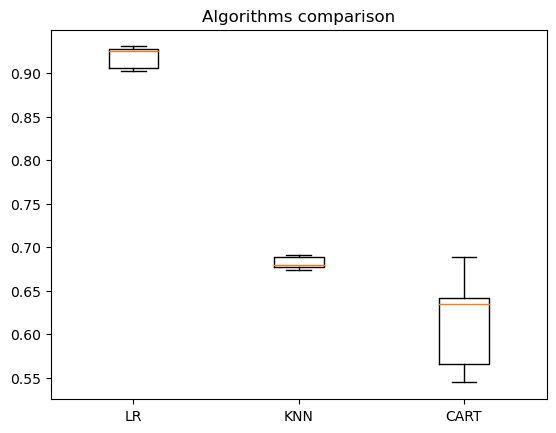

In [35]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

models = []
models.append(('LR', LinearRegression(n_jobs = -1)))
models.append(('KNN', KNeighborsRegressor(n_neighbors = 20, n_jobs = -1)))
models.append(('CART', DecisionTreeRegressor(random_state = 42)))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits = 5, random_state = 42, shuffle = True)
    cv_results = cross_val_score(model, x, y, cv = kfold, scoring = 'r2')
    #cv_results = cross_val_score(model, x, y, cv = kfold, scoring = 'neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: mean - {cv_results.mean()}; std - {cv_results.std()}')
plt.boxplot(results, labels = names)
plt.title('Algorithms comparison')
plt.show()

## Ensemble methods

LR: mean - 0.9184831956142336; std - 0.011849125380644953
KNN: mean - 0.682049537726592; std - 0.006920354685583691
CART: mean - 0.6151377367381382; std - 0.052797193102833435
RF: mean - 0.833696694843173; std - 0.019497746808770276
XT: mean - 0.8587263937182742; std - 0.011781957757335258
BG: mean - 0.8087940244328532; std - 0.01948837201548251
ADA: mean - 0.7772938022351312; std - 0.0346502344354916
HG: mean - 0.8615879159555229; std - 0.013530623575593674
XGB: mean - 0.8351842272727714; std - 0.014576951913176884


Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


CAT: mean - 0.8902501141544032; std - 0.013708391802446313


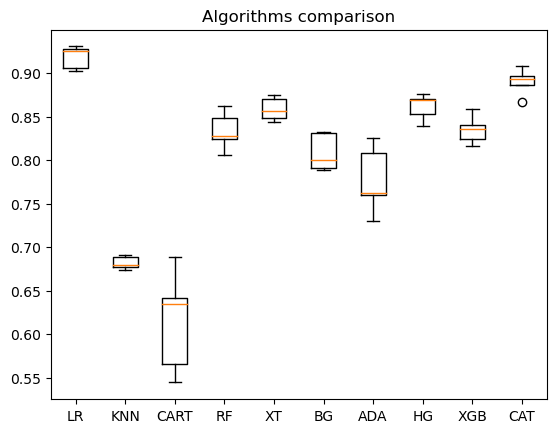

In [36]:
models.append(('RF', RandomForestRegressor(n_jobs = -1, random_state = 42)))
models.append(('XT', ExtraTreesRegressor(n_jobs = -1, random_state = 42)))
models.append(('BG', BaggingRegressor(n_jobs = -1, random_state = 42)))
models.append(('ADA', AdaBoostRegressor(random_state = 42)))
models.append(('HG', HistGradientBoostingRegressor(random_state = 42)))
models.append(('XGB', XGBRegressor(tree_method = 'gpu_hist', verbosity = 0, random_state = 42)))
models.append(('CAT', CatBoostRegressor(
    random_seed = 42,
    loss_function = 'RMSE',
    eval_metric = 'R2',
    od_type = 'Iter',
    od_wait = 20,
    task_type = 'GPU',
    logging_level = 'Silent')))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits = 5, random_state = 42, shuffle = True)
    cv_results = cross_val_score(model, x, y, cv = kfold, scoring = 'r2')
    #cv_results = cross_val_score(model, x, y, cv = kfold, scoring = 'neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: mean - {cv_results.mean()}; std - {cv_results.std()}')
plt.boxplot(results, labels = names)
plt.title('Algorithms comparison')
plt.show()

# Grid search for Random Forest regressor

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

parameters = {
    'max_depth': [4, 8, 16, 32, 64, 128]
}

reg = RandomForestRegressor(random_state = 42)
reg.fit(x_train, y_train)
gs = GridSearchCV(estimator = reg, scoring = 'r2', cv = 5, param_grid = parameters, n_jobs = -1, verbose = 4)     
gs.fit(x_train, y_train)

print(f'Best parameters: {gs.best_params_}')
reg.set_params(**gs.best_params_)

y_pred = reg.predict(x_test)
print(f'R2 score: {r2_score(y_test, y_pred)}')
print(f'MAE error: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE error: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE error: {np.sqrt(mean_squared_error(y_test, y_pred))}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'max_depth': 32}
R2 score: 0.8544972678022185
MAE error: 0.3011626257554567
MSE error: 0.14836884594317884
RMSE error: 0.3851867676117377


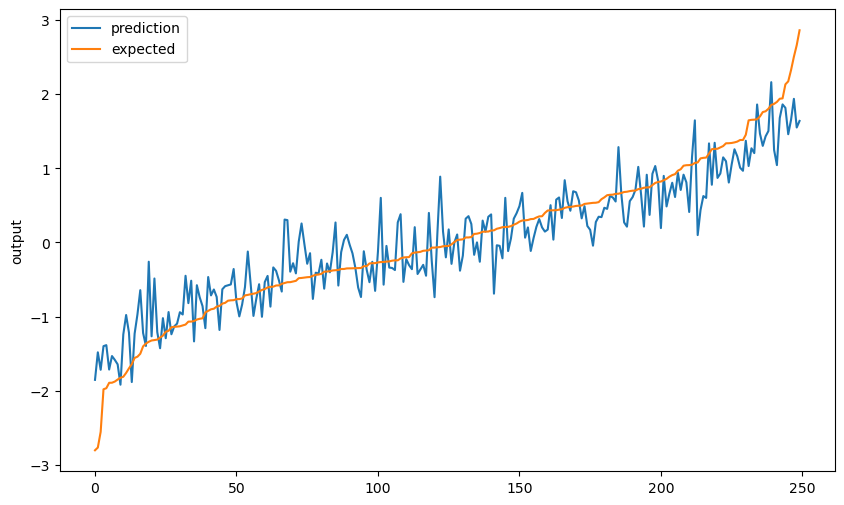

In [9]:
def show_regression_chart(y, prediction, sort = True):
    t = pd.DataFrame({'prediction': prediction, 'y': y})
    if sort:
        t.sort_values(by = ['y'], inplace = True)
    plt.figure(figsize = (10, 6))
    plt.plot(t['prediction'].tolist(), label = 'prediction')
    plt.plot(t['y'].tolist(), label = 'expected')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
show_regression_chart(y_test, y_pred)

## Feature importance based on mean decrease in impurity

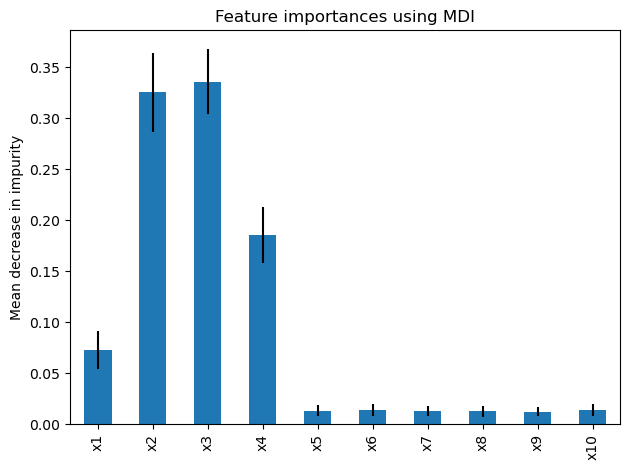

In [21]:
importances = reg.feature_importances_
std = np.std([tree.feature_importances_ for tree in reg.estimators_], axis = 0)
forest_importances = pd.Series(importances, index = list(x.columns))
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr = std, ax = ax)
ax.set_title('Feature importances using MDI')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

## Feature importance based on feature permutation

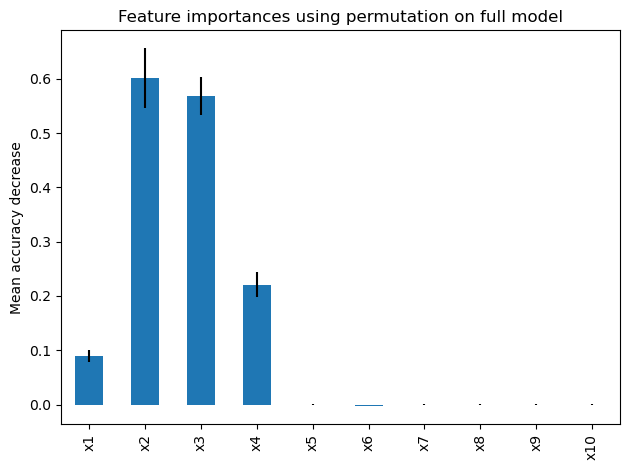

In [23]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    reg,
    x_test,
    y_test,
    n_repeats = 10,
    random_state = 42,
    n_jobs = -1)
forest_importances = pd.Series(result.importances_mean, index = list(x.columns))
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr = result.importances_std, ax = ax)
ax.set_title('Feature importances using permutation on full model')
ax.set_ylabel('Mean accuracy decrease')
fig.tight_layout()
plt.show()

# Multilayer perceptron for regression

In [24]:
import tensorflow as tf
from tensorflow import keras
from keras import Input
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, BatchNormalization, ReLU
from keras.layers import MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
# Image preprocessing
from keras.layers import Rescaling, Resizing, CenterCrop
# Image augmentation
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import RandomCrop, RandomFlip, RandomTranslation, RandomRotation, RandomZoom, RandomContrast

# List of devices
tf.config.list_physical_devices()

# Plot model function
# keras.utils.plot_model(model, show_shapes = True)

# Model loading function
# model = keras.models.load_model('model.keras', compile = False)
# model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# model.summary()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [26]:
def show_regression_chart(y, prediction, sort = True):
    t = pd.DataFrame({'prediction': prediction, 'y': y})
    if sort:
        t.sort_values(by = ['y'], inplace = True)
    plt.figure(figsize = (10, 6))
    plt.plot(t['prediction'].tolist(), label = 'prediction')
    plt.plot(t['y'].tolist(), label = 'expected')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [86]:
def show_training_history(history, metrics, metric_names, figure_size = (7, 6), last_epoch = None):
    if len(metrics) == 1 and len(metric_names) == 1:
        plt.figure(figsize = figure_size)
        fig, ax = plt.subplots()
        metric = metrics[0]
        metric_name = metric_names[0]
        ax.plot(history[metric], color = 'b', label = f'Training {metric_name}')
        if f'val_{metric}' in history:
            ax.plot(history[f'val_{metric}'], color = 'r', label = f'Validation {metric_name}')
        if last_epoch is not None:
            ax.axvline(x = last_epoch, color = 'g', label = 'Start of fine tuning')
        legend = ax.legend(loc = 'best', shadow = True)
        plt.show()
    elif len(metrics) > 1 and len(metrics) == len(metric_names):
        plt.figure(figsize = figure_size)
        fig, ax = plt.subplots(len(metrics), 1)
        for i in range(len(metrics)):
            metric = metrics[i]
            metric_name = metric_names[i]
            ax[i].plot(history[metric], color = 'b', label = f'Training {metric_name}')
            if f'val_{metric}' in history:
                ax[i].plot(history[f'val_{metric}'], color = 'r', label = f'Validation {metric_name}', axes = ax[i])
            if last_epoch is not None:
                ax[i].axvline(x = last_epoch, color = 'g', label = 'Start of fine tuning')
            legend = ax[i].legend(loc = 'best', shadow = True)
        plt.show()
    else:
        raise Exception('Invalid metrics/metric names amount')

---
Training for fold 1...
Epoch 1/5
25/25 [==============================] - 1s 8ms/step - loss: 0.9273 - mean_absolute_error: 0.7720
Epoch 2/5
25/25 [==============================] - 0s 7ms/step - loss: 0.6072 - mean_absolute_error: 0.6085
Epoch 3/5
25/25 [==============================] - 0s 8ms/step - loss: 0.4398 - mean_absolute_error: 0.5146
Epoch 4/5
25/25 [==============================] - 0s 8ms/step - loss: 0.3791 - mean_absolute_error: 0.4776
Epoch 5/5
25/25 [==============================] - 0s 8ms/step - loss: 0.3225 - mean_absolute_error: 0.4526
Score for fold 1: loss of 0.17382588982582092; mean_absolute_error of 0.32478493452072144


<Figure size 700x600 with 0 Axes>

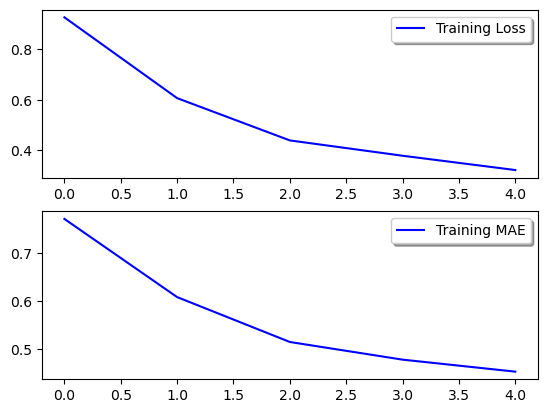

R2 score: 0.8383338240297817
MSE error: 0.17382589939415405
RMSE error: 0.41692433293603054


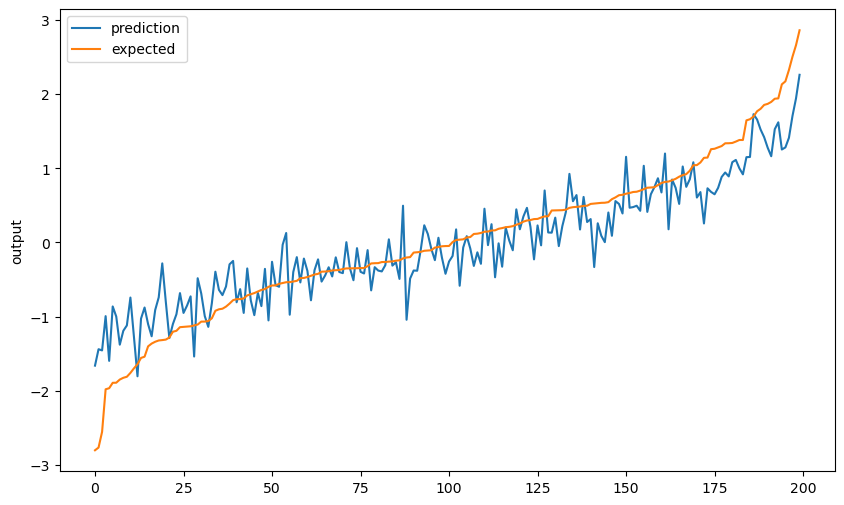

---
Training for fold 2...
Epoch 1/5
25/25 [==============================] - 1s 8ms/step - loss: 0.9096 - mean_absolute_error: 0.7540
Epoch 2/5
25/25 [==============================] - 0s 6ms/step - loss: 0.6313 - mean_absolute_error: 0.6119
Epoch 3/5
25/25 [==============================] - 0s 6ms/step - loss: 0.4798 - mean_absolute_error: 0.5357
Epoch 4/5
25/25 [==============================] - 0s 6ms/step - loss: 0.3898 - mean_absolute_error: 0.4880
Epoch 5/5
25/25 [==============================] - 0s 6ms/step - loss: 0.3356 - mean_absolute_error: 0.4489
Score for fold 2: loss of 0.15916894376277924; mean_absolute_error of 0.32335731387138367


<Figure size 700x600 with 0 Axes>

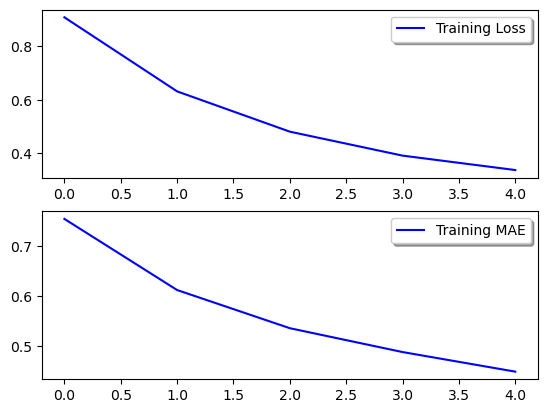

R2 score: 0.8104898955908604
MSE error: 0.15916895416070853
RMSE error: 0.39895984028559633


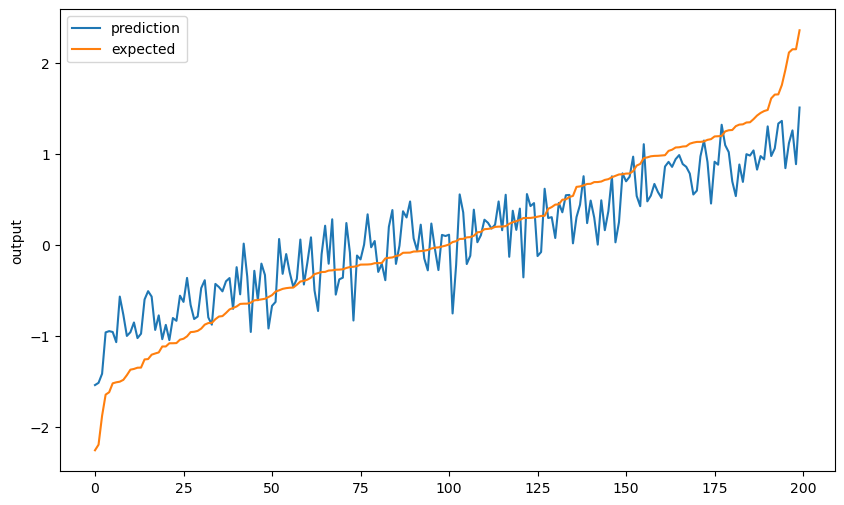

---
Training for fold 3...
Epoch 1/5
25/25 [==============================] - 1s 6ms/step - loss: 0.9285 - mean_absolute_error: 0.7744
Epoch 2/5
25/25 [==============================] - 0s 6ms/step - loss: 0.6584 - mean_absolute_error: 0.6419
Epoch 3/5
25/25 [==============================] - 0s 7ms/step - loss: 0.4167 - mean_absolute_error: 0.4982
Epoch 4/5
25/25 [==============================] - 0s 6ms/step - loss: 0.3219 - mean_absolute_error: 0.4444
Epoch 5/5
25/25 [==============================] - 0s 6ms/step - loss: 0.2931 - mean_absolute_error: 0.4270
Score for fold 3: loss of 0.1674194186925888; mean_absolute_error of 0.3272150456905365


<Figure size 700x600 with 0 Axes>

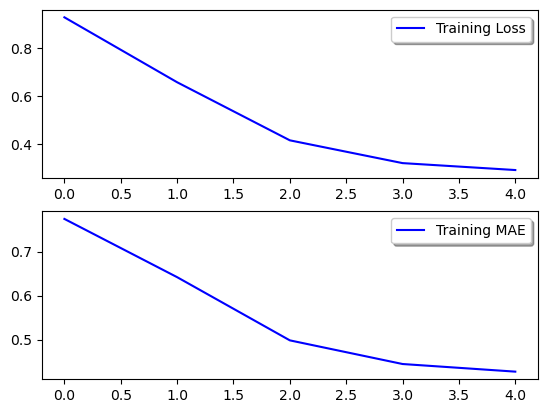

R2 score: 0.8550952362778235
MSE error: 0.16741942039293733
RMSE error: 0.40916918309293204


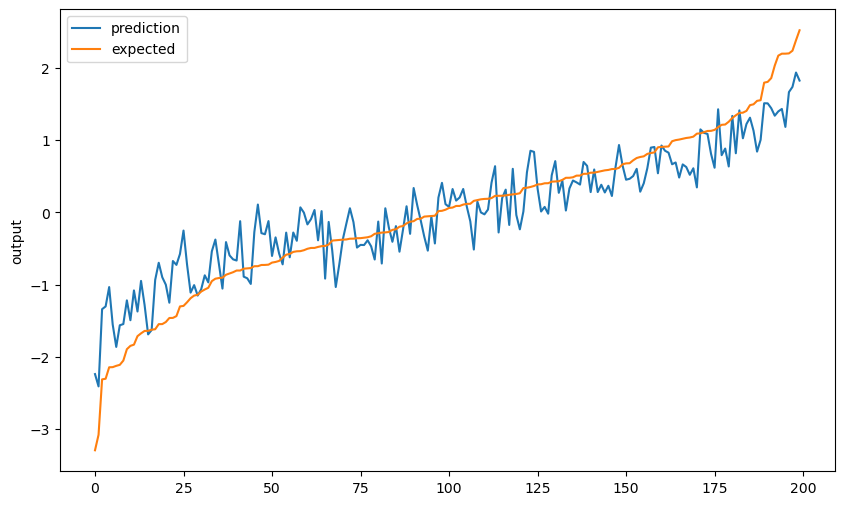

---
Training for fold 4...
Epoch 1/5
25/25 [==============================] - 1s 5ms/step - loss: 0.9572 - mean_absolute_error: 0.7814
Epoch 2/5
25/25 [==============================] - 0s 7ms/step - loss: 0.6620 - mean_absolute_error: 0.6445
Epoch 3/5
25/25 [==============================] - 0s 6ms/step - loss: 0.4856 - mean_absolute_error: 0.5482
Epoch 4/5
25/25 [==============================] - 0s 6ms/step - loss: 0.3932 - mean_absolute_error: 0.4950
Epoch 5/5
25/25 [==============================] - 0s 7ms/step - loss: 0.3440 - mean_absolute_error: 0.4609
Score for fold 4: loss of 0.16714006662368774; mean_absolute_error of 0.3188781440258026


<Figure size 700x600 with 0 Axes>

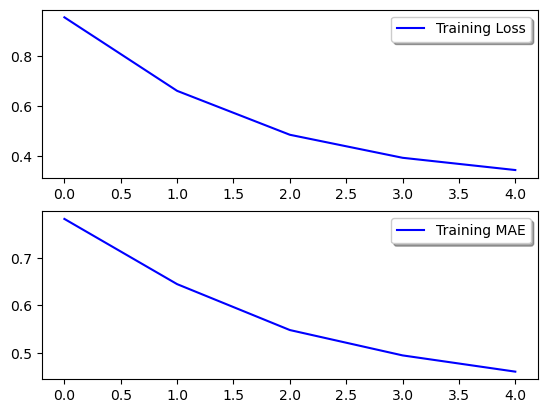

R2 score: 0.838248033497853
MSE error: 0.16714005764559822
RMSE error: 0.4088276625249302


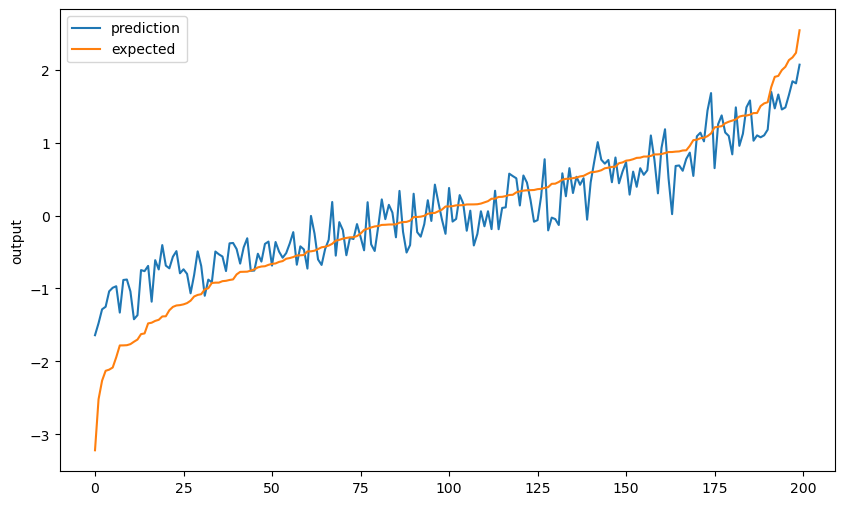

---
Training for fold 5...
Epoch 1/5
25/25 [==============================] - 1s 5ms/step - loss: 0.9353 - mean_absolute_error: 0.7635
Epoch 2/5
25/25 [==============================] - 0s 6ms/step - loss: 0.7095 - mean_absolute_error: 0.6598
Epoch 3/5
25/25 [==============================] - 0s 6ms/step - loss: 0.4987 - mean_absolute_error: 0.5500
Epoch 4/5
25/25 [==============================] - 0s 5ms/step - loss: 0.3692 - mean_absolute_error: 0.4783
Epoch 5/5
25/25 [==============================] - 0s 6ms/step - loss: 0.3044 - mean_absolute_error: 0.4332
Score for fold 5: loss of 0.1507261097431183; mean_absolute_error of 0.3089534044265747


<Figure size 700x600 with 0 Axes>

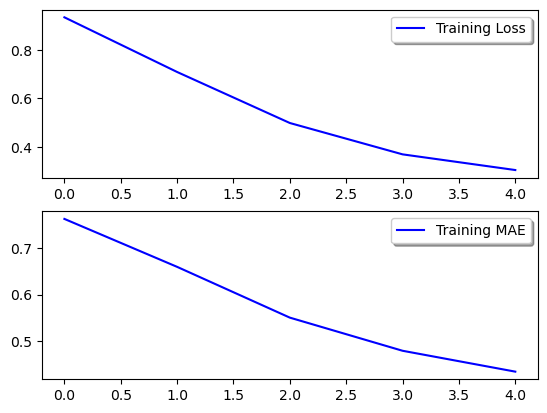

R2 score: 0.8289186503116945
MSE error: 0.15072610414775917
RMSE error: 0.38823459936970994


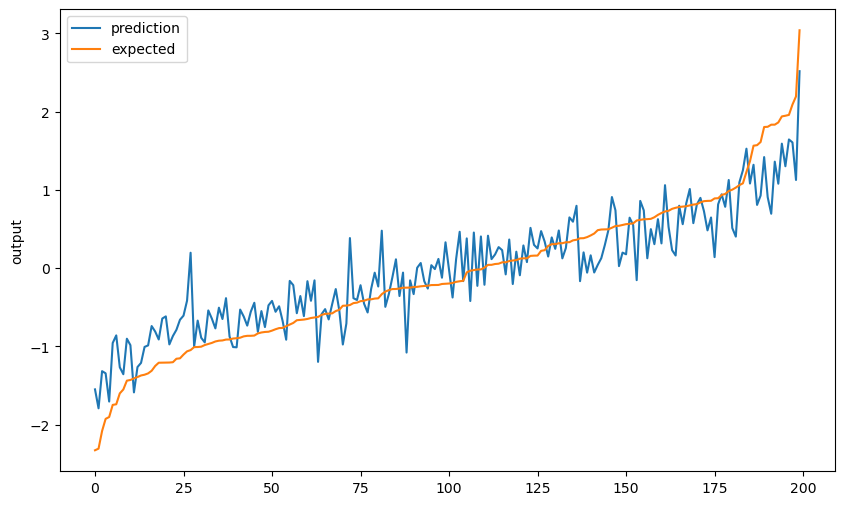

---
Score per fold
---
> Fold 1 - Loss: 0.17382588982582092 - MSE: 0.17382589939415405
---
> Fold 2 - Loss: 0.15916894376277924 - MSE: 0.15916895416070853
---
> Fold 3 - Loss: 0.1674194186925888 - MSE: 0.16741942039293733
---
> Fold 4 - Loss: 0.16714006662368774 - MSE: 0.16714005764559822
---
> Fold 5 - Loss: 0.1507261097431183 - MSE: 0.15072610414775917
---
Average scores for all folds:
> Loss: 0.163656085729599
> MAE: 0.32063776850700376 (+- 0.006441678824066575)
> MSE: 0.16365608714823146 (+- 0.007962972202573188)
> RMSE: 0.40442312364183985 (+- 0.009900717752194156)
> R2: 0.8342171279416026 (+- 0.014561223947220644)
---


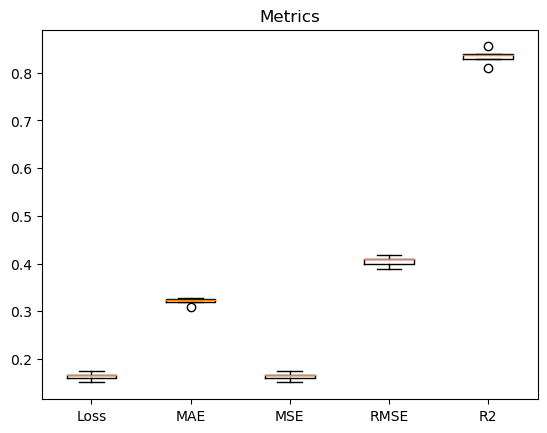

In [87]:
from sklearn.model_selection import KFold

batch_size = 32
epochs = 5
num_folds = 5
mse_per_fold = []
rmse_per_fold = []
mae_per_fold = []
r2_per_fold = []
loss_per_fold = []
histories = []
kfold = KFold(n_splits = num_folds, random_state = 42, shuffle = True)
fold_no = 1
for train, test in kfold.split(x, y):
    model = Sequential(
    [
        Input(shape = x_train.shape[1]),
        Dense(50, activation = 'relu'),
        Dropout(0.20),
        Dense(50, activation = 'relu'),
        Dropout(0.25),
        Dense(50, activation = 'relu'),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
    print('---')
    print(f'Training for fold {fold_no}...')
    history = model.fit(
        x = x.iloc[train],
        y = y[train],
        batch_size = batch_size,
        epochs = epochs)
    histories.append(history.history)
    scores = model.evaluate(x.iloc[test], y[test], verbose = 0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]}')
    mae_per_fold.append(scores[1])
    loss_per_fold.append(scores[0])
    show_training_history(history.history, ['loss', 'mean_absolute_error'], ['Loss', 'MAE'])
    y_pred = model.predict(x.iloc[test], verbose = 0)
    y_pred = y_pred.flatten()
    r2 = r2_score(y[test], y_pred)
    mse = mean_squared_error(y[test], y_pred)
    rmse = np.sqrt(mean_squared_error(y[test], y_pred))
    print(f'R2 score: {r2}')
    print(f'MSE error: {mse}')
    print(f'RMSE error: {rmse}')
    r2_per_fold.append(r2)
    mse_per_fold.append(mse)
    rmse_per_fold.append(rmse)
    show_regression_chart(y[test], y_pred)
    fold_no = fold_no + 1
print('---')
print('Score per fold')
for i in range(0, len(mse_per_fold)):
    print('---')
    print(f'> Fold {i + 1} - Loss: {loss_per_fold[i]} - MSE: {mse_per_fold[i]}')
print('---')
print('Average scores for all folds:')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> MAE: {np.mean(mae_per_fold)} (+- {np.std(mae_per_fold)})')
print(f'> MSE: {np.mean(mse_per_fold)} (+- {np.std(mse_per_fold)})')
print(f'> RMSE: {np.mean(rmse_per_fold)} (+- {np.std(rmse_per_fold)})')
print(f'> R2: {np.mean(r2_per_fold)} (+- {np.std(r2_per_fold)})')
print('---')
metrics = [
    loss_per_fold,
    mae_per_fold,
    mse_per_fold,
    rmse_per_fold,
    r2_per_fold]
plt.boxplot(metrics, labels = ['Loss', 'MAE', 'MSE', 'RMSE', 'R2'])
plt.title('Metrics')
plt.show()